## Project: Exploratory Data Analysis (EDA) on Retail Sales Data

### PROJECT DESCRIPTION
In this project, you will work with a dataset containing information about retail sales. The goal is to perform exploratory data analysis (EDA) to uncover patterns, trends, and insights that can help the retail business make informed decisions. Through various data analysis techniques, you will identify key factors affecting sales, customer purchasing behavior, and overall performance metrics. The insights derived from this analysis will be crucial for strategic planning and improving business operations.

### OBJECTIVES
1. *Data Loading and Cleaning*

2. *Descriptive Statistics*

3. *Time Series Analysis*

4. *Customer and Product Analysis*

5. *Visualization*

6. *Recommendations*


## STEP 1: IMPORT NECESSARY LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as math
import seaborn as sns

## STEP 2: LOADING DATA

In [5]:
data = pd.read_csv('retail.csv')

## STEP 3: DATA INSPECTION

In [8]:
#showing first 10 rows
data.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


In [10]:
#gives (num rows, num col)
data.shape

(1000, 9)

In [12]:
data.dtypes

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

In [14]:
data.nunique()

Transaction ID      1000
Date                 345
Customer ID         1000
Gender                 2
Age                   47
Product Category       3
Quantity               4
Price per Unit         5
Total Amount          18
dtype: int64

In [16]:
data.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [23]:
data.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

## STEP4: TIME SERIES ANALYSIS 

In [20]:
# Calculate descriptive statistics
mean_sales = data['Total Amount'].mean()
median_sales = data['Total Amount'].median()
mode_sales = data['Total Amount'].mode()[0]
std_sales = data['Total Amount'].std()

print(f"Mean Sales: {mean_sales}")
print(f"Median Sales: {median_sales}")
print(f"Mode Sales: {mode_sales}")
print(f"Standard Deviation of Sales: {std_sales}")

Mean Sales: 456.0
Median Sales: 135.0
Mode Sales: 50
Standard Deviation of Sales: 559.997631555123


### 1. Monthly Sales Trend

C:\Users\Mehak\AppData\Local\Temp\ipykernel_14972\2461590942.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data.resample('M', on='Date')['Total Amount'].sum()


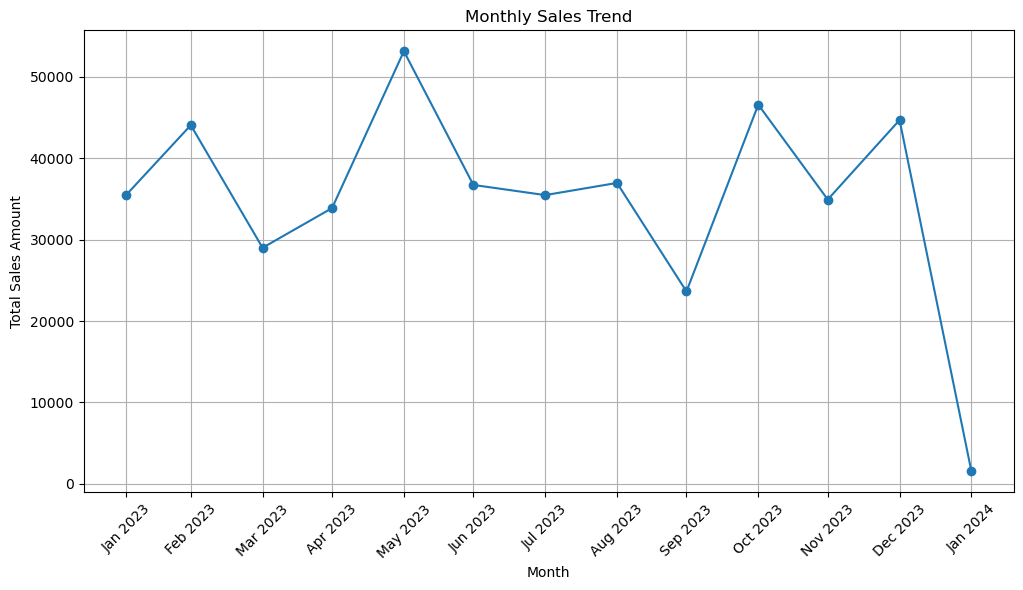

In [81]:
import matplotlib.pyplot as plt
data['Date']=pd.to_datetime(data['Date'])
monthly_sales = data.resample('M', on='Date')['Total Amount'].sum()
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(ticks=monthly_sales.index, labels=[month.strftime('%b %Y') for month in monthly_sales.index], rotation=45)
plt.grid(True)
plt.show()

#### There was a significant slump in total sales in the month of September of 2023, while there was a significant rise in sales in the month of May of 2023

### 2. Monthly Sales Trend by Product Category

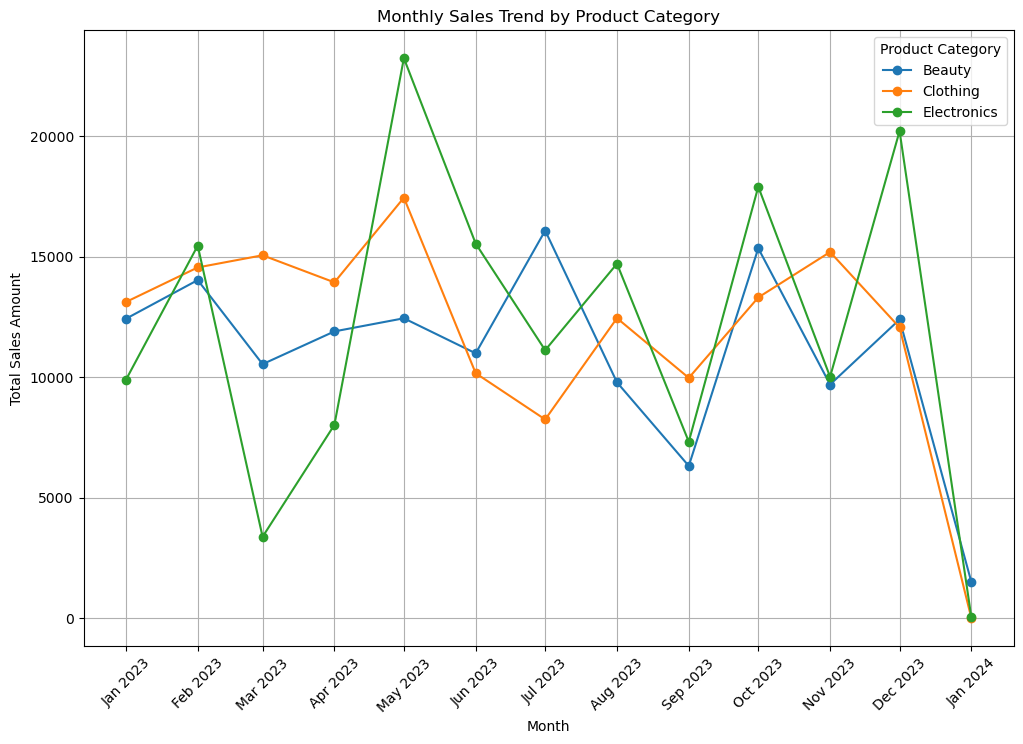

In [34]:
monthly_category_sales = data.groupby([data['Date'].dt.to_period('M'), 'Product Category'])['Total Amount'].sum().reset_index()

pivot_table = monthly_category_sales.pivot(index='Date', columns='Product Category', values='Total Amount').fillna(0)

plt.figure(figsize=(12, 8))
for category in pivot_table.columns:
    plt.plot(pivot_table.index.to_timestamp(), pivot_table[category], marker='o', label=category)  # Convert index to timestamp for better plotting

plt.title('Monthly Sales Trend by Product Category')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.legend(title='Product Category')
plt.grid(True)
plt.xticks(ticks=pivot_table.index.to_timestamp(), labels=[date.strftime('%b %Y') for date in pivot_table.index.to_timestamp()], rotation=45)  # Convert index to timestamp and format the labels
plt.show()

#### Here, we can see the total sales amount generated per month by the product categories. We see that in the month of March of 2023, there was a dip in sales in Electronics, which boomed in the month of May 2023, which was that year's highest sale for Electronics. Likewise, for Clothing, it reached its peak in the month of May 2023 but then dipped in the month of July 2023 and so on.In May, Electronics sales and Clothing peaked and Beauty sales remained moderate. We can make one observation, that is in the month of May 2023, two of three product categories fared well and generated a high sales amount, while in the month of September 2023, all the three categories did not generate high sales amount with Beauty reaching its all-time low, which suggests that something might have occurred in that particular month owing to low product sales.


### 3.Sales Distribution by Product Category

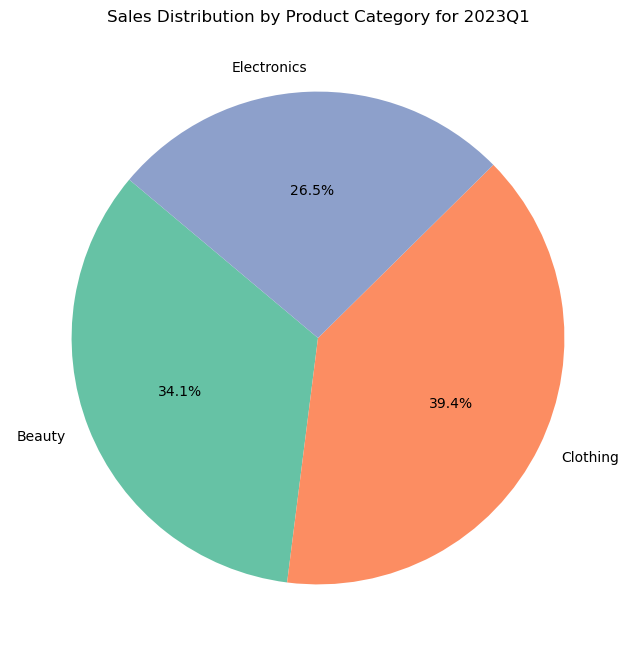

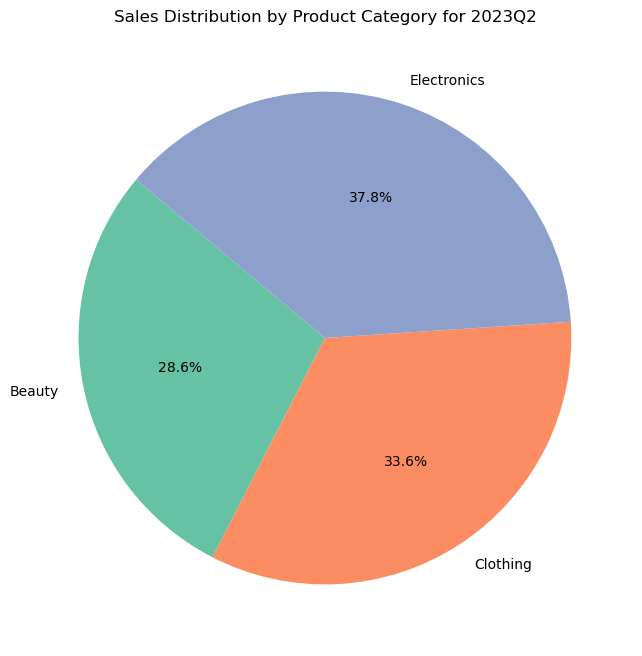

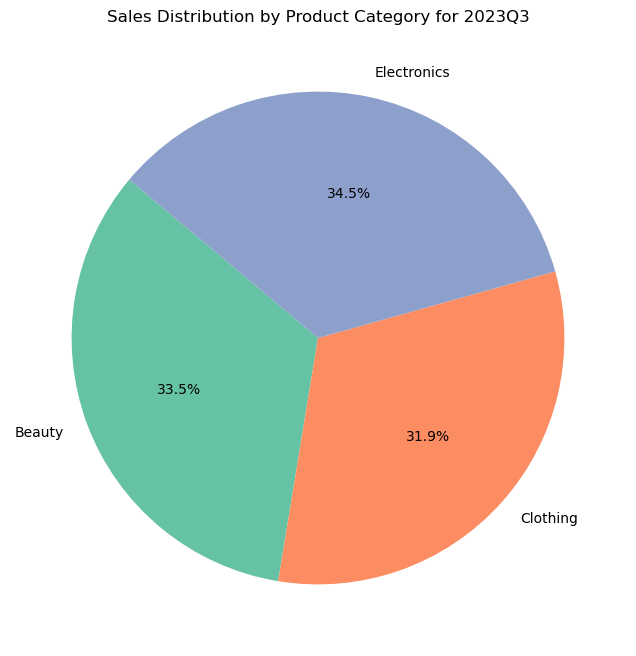

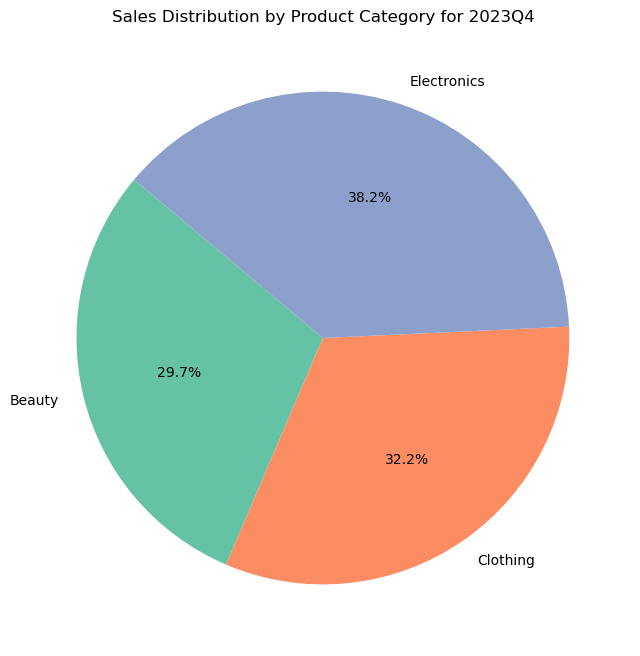

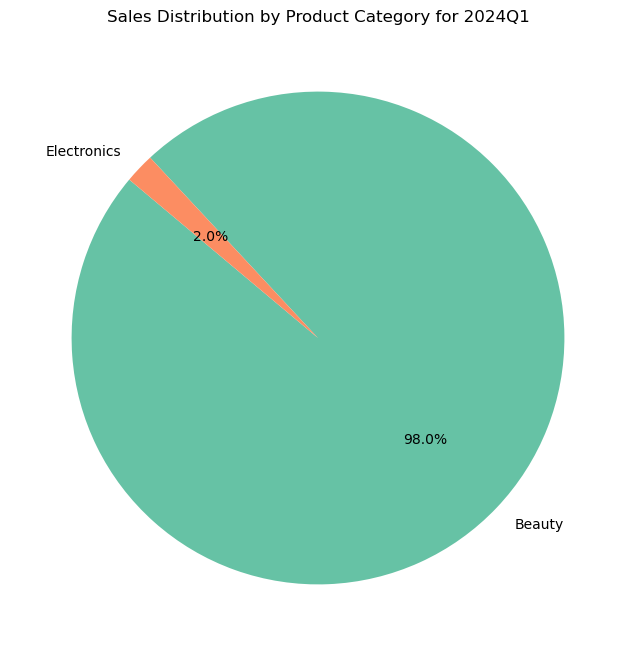

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Date' to datetime if not already
data['Date'] = pd.to_datetime(data['Date'])

# Aggregate sales data by quarter and product category
quarterly_category_sales = data.groupby([data['Date'].dt.to_period('Q'), 'Product Category'])['Total Amount'].sum().reset_index()

# Create pie charts for each quarter
quarters = quarterly_category_sales['Date'].unique()

for quarter in quarters:
    # Filter the data for the specific quarter
    quarterly_data = quarterly_category_sales[quarterly_category_sales['Date'] == quarter]
    
    # Aggregate the total sales by product category for the specific quarter
    category_sales = quarterly_data.groupby('Product Category')['Total Amount'].sum()
    
    # Plotting the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
    plt.title(f'Sales Distribution by Product Category for {quarter}')
    plt.show()


#### In the analysis of sales distribution by product category, the data reveals that Electronics emerged as the top-selling category during the all four quarters of 2023, indicating a strong consumer preference and high demand for electronic products during that period. Conversely, in Q1 2024, the Beauty category experienced a notable increase in sales, suggesting a shift in consumer focus towards beauty products at the beginning of the new year. This trend highlights the dynamic nature of consumer preferences and emphasizes the importance of adapting sales strategies to align with evolving market demands.

### 4. Average Sales by Product Category

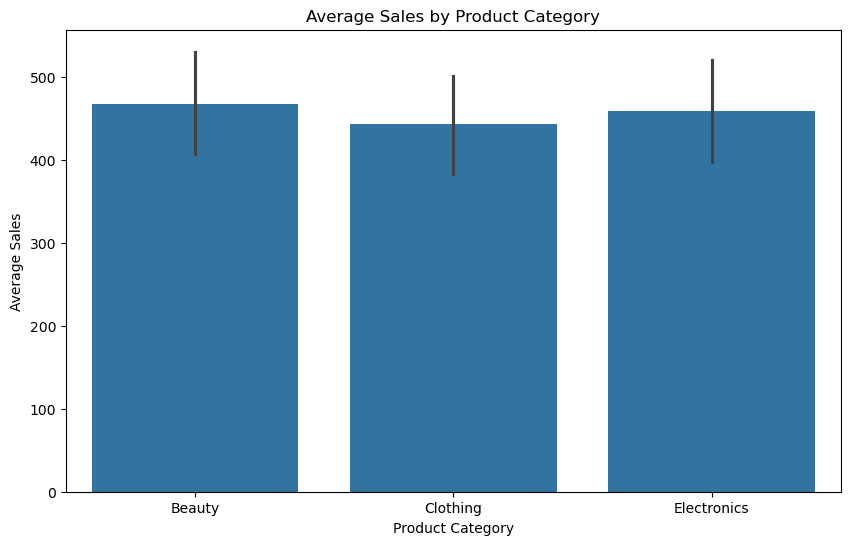

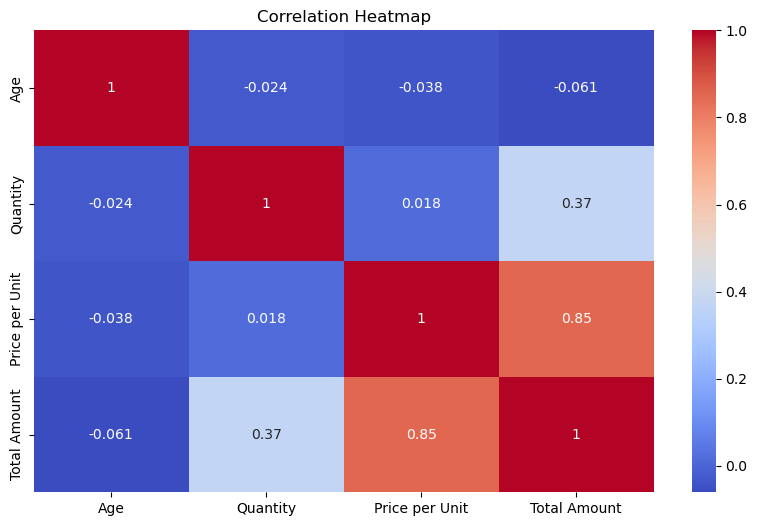

In [42]:
import seaborn as sns

# Bar chart example: Average sales by product category
plt.figure(figsize=(10, 6))
sns.barplot(x='Product Category', y='Total Amount', data=data)
plt.title('Average Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Sales')
plt.show()

# Heatmap example: Correlation between different numerical features
numeric_df = data[['Age', 'Quantity', 'Price per Unit', 'Total Amount']]

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### 5. Top Selling Products

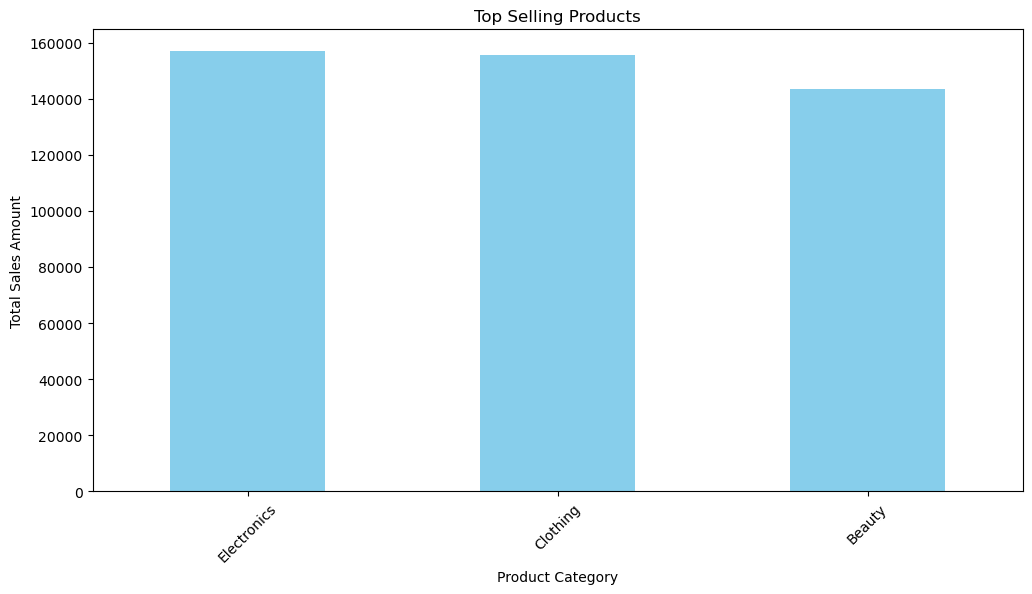

In [61]:
# Top Selling Products
top_selling_products = data.groupby('Product Category')['Total Amount'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
top_selling_products.plot(kind='bar', color='skyblue')
plt.title('Top Selling Products')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()

#### The sales data indicates that Electronics and Beauty are the top-performing product categories. Electronics recorded the highest sales in the fourth quarter of 2023, showcasing its dominance in the market during that period. On the other hand, Beauty products emerged as the leading category in the first quarter of 2024, reflecting a significant consumer interest at the start of the new year. This pattern suggests that both categories are key drivers of sales, highlighting their importance in the product lineup and the need for targeted marketing strategies to capitalize on their popularity.

## STEP 5: CUSTOMER AND PRODUCT VISUALIZATION

### 1.Gender vs Product Category

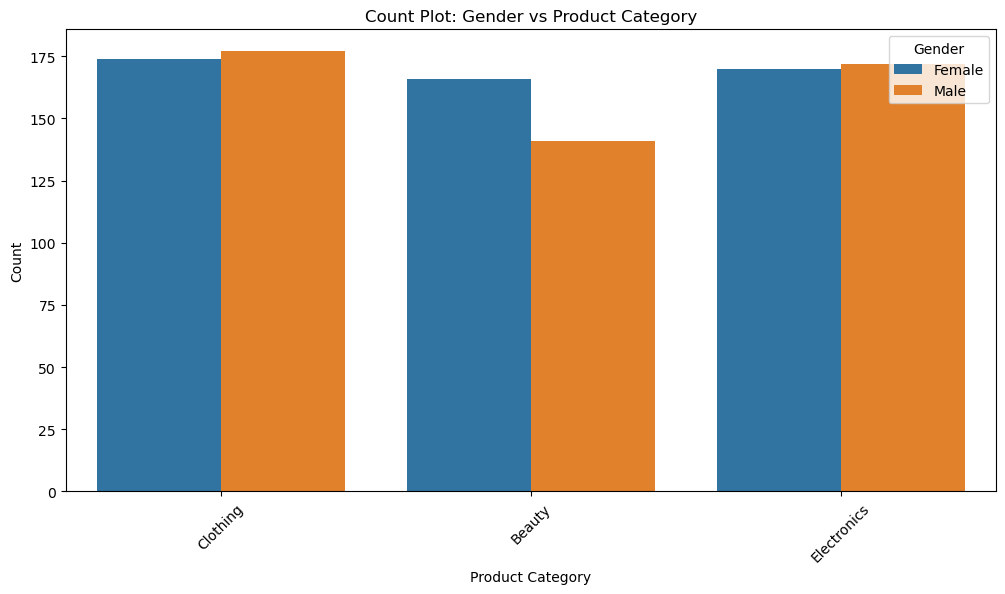

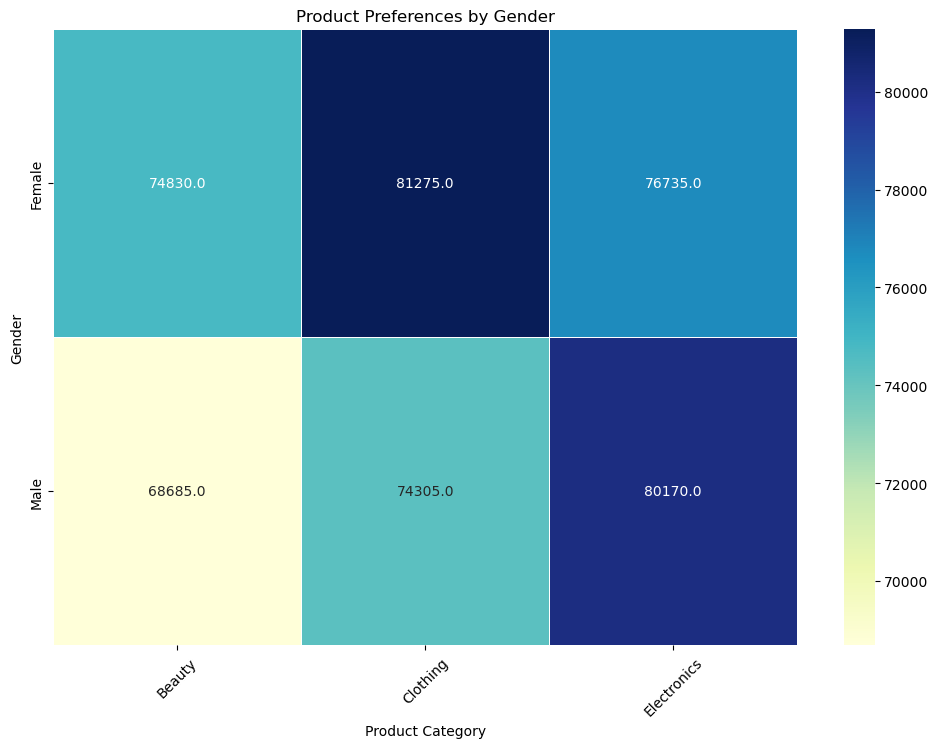

In [67]:
# Count Plot: Count of Gender and Product Category
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Product Category', hue='Gender')
plt.title('Count Plot: Gender vs Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

# Product Preferences by Gender
gender_product_sales = data.groupby(['Gender', 'Product Category'])['Total Amount'].sum().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(gender_product_sales, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)
plt.title('Product Preferences by Gender')
plt.xlabel('Product Category')
plt.ylabel('Gender')
plt.xticks(rotation=45)
plt.show()

#### Clothing was the top-selling product for females, while electronics led in sales for males.
#### The heatmap visualizes product preferences by gender. Electronics is the most preferred product category for males, indicated by the darkest blue square. Clothing is the most preferred product category for females, shown by the darkest blue square in that quadrant. Beauty products have the lowest preference for both genders.

### 2. Total Sales by Gender

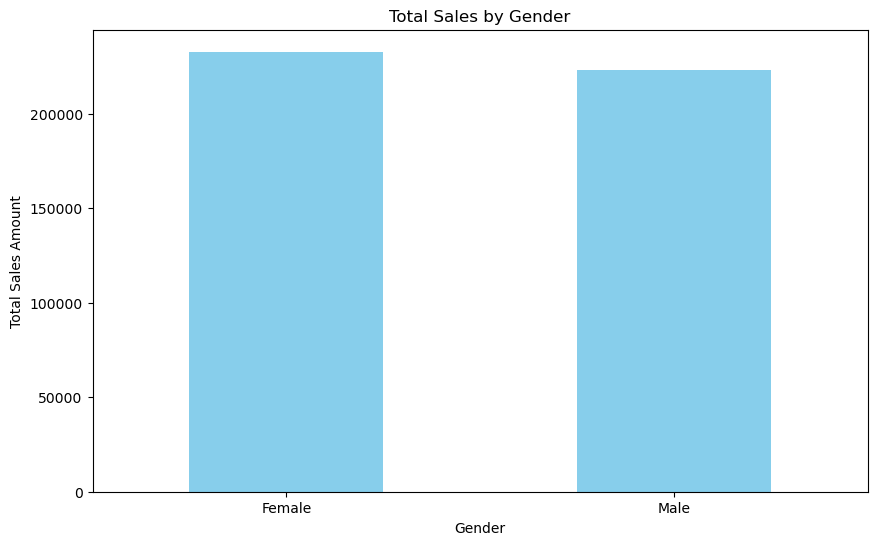

In [117]:
# Customer Gender Analysis
gender_sales = data.groupby('Gender')['Total Amount'].sum()

plt.figure(figsize=(10, 6))
gender_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=0)
plt.show()

#### Based on the given data, it appears that female customers contribute to a higher total sales amount compared to male customers within the analyzed dataset.

### 3.Age Group Distribution

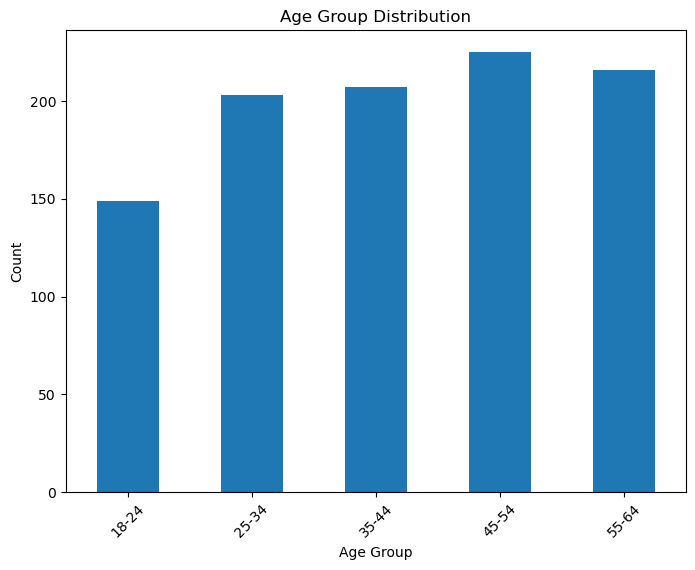

In [128]:
age_bins = [18, 25, 35, 45, 55, 65]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64']
data['Age Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

age_distribution = data['Age Group'].value_counts().sort_index()

age_distribution.plot(kind='bar', figsize=(8, 6), title='Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### By observing the graph, it is evident that the majority of shoppers fall within the age group of 45-54, indicating that this demographic is the most engaged with the products or services offered. Conversely, the age group 18-24 shows the lowest engagement, suggesting that younger customers are less represented in the shopping data. 

### 4. Age Distribution By Product Category And Gender

Product Category  Gender
Beauty            Female    40.355422
                  Male      40.390071
Clothing          Female    43.166667
                  Male      40.751412
Electronics       Female    40.482353
                  Male      42.976744
Name: Age, dtype: float64


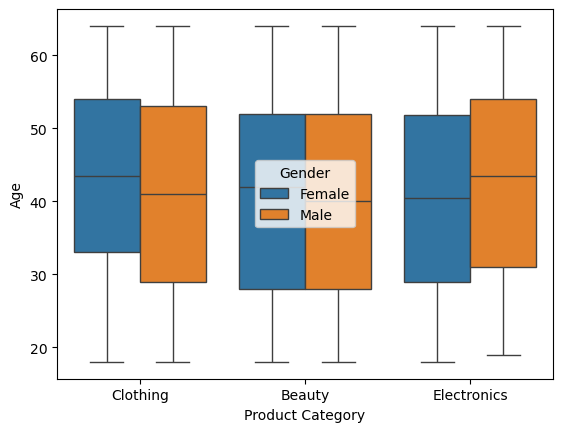

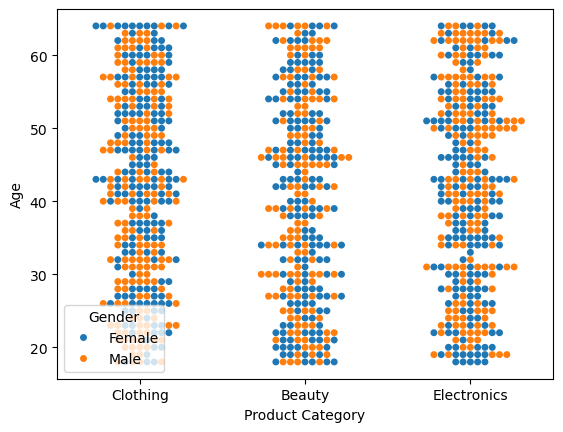

In [124]:
# Group by product category and gender to calculate mean age
mean_age_by_category_gender = data.groupby(['Product Category', 'Gender'])['Age'].mean()
print(mean_age_by_category_gender)

# Box plots for age distribution by product category and gender
sns.boxplot(x='Product Category', y='Age', hue='Gender', data=data)
plt.show()

# Swarm plot for age distribution by product category and gender
sns.swarmplot(x='Product Category', y='Age', hue='Gender', data=data)
plt.show()

#### Electronics appeal to a wider age range, especially older males. Clothing targets a younger demographic with equal interest from both genders. Beauty products primarily attract young females.
#### The swarm plot shows age distribution across product categories by gender. Electronics have a wider age range with a more even gender split. Clothing has a wider age range for females, while Beauty primarily attracts a younger female audience.

## STEP 6: RECOMMENDATION

### 1. INFERRENCE- TIME SERIES

(I) Sales dropped significantly in September 2023 but surged in May 2023.

(II) Electronics saw a dip in March 2023 but peaked in May 2023. Clothing sales were highest in May 2023 but fell in July 2023.

(III) May 2023 saw high sales for Electronics and Clothing, while September 2023 had low sales across all categories, with Beauty at its lowest, suggesting an external factor might have influenced these results.

(IV) Electronics had the highest sales in its peak month, and Beauty had the lowest in its weakest month. May 16, 2023, saw an unusually high number of transactions.

(V) Electronics had its highest sales in May and lowest in March, while Clothing showed a steady trend with a peak in May and a low in July. Beauty sales were highest in July and lowest in September.

### RECOMMENDATONS

(I) To maximize revenue, consider boosting marketing efforts for Electronics and Clothing during May, especially on May 16.

(II) Address the downward trend in Clothing sales and investigate the sales slump in September for potential improvements.

### 2. INFERENCE - PRODUCT CATEGORY

(I) Electronics led in revenue, followed by Clothing, with Beauty generating the least revenue.

(II) Beauty products generate the highest total revenue when purchased in quantities of 2, but revenue drops significantly with larger quantities.

### RECOMMENDATIONS

(I) To boost revenue, introduce and aggressively market higher-end Beauty products, as the current lower-priced items are frequently purchased but contribute less to revenue.

(II) Create a targeted product segment for items priced between $0-200 with specific marketing and shelf strategies to enhance the shopping experience and increase revenue.

### 3. INFERENCE - GENDER:
(I) Female histogram shows that there is no significant preference of purchase between different product categories, while for male there is a significant lesser preference for beauty products.

(II) Females spend the most on Clothing products and the least on Beauty while males spend most on Electronics and least on Beauty products.

(III)Males buy clothing products more frequently as compared to females. Females buy more beauty products as compared to males in terms of frequency.

### RECOMMENDATIONS
Since females show a tendency to buy Beauty products more frequently but spending least, the shop can introduce more high value female Beauty products to generate more revenue from the female customers.

### 4. INFERENCES- AGE:

(I) The average shopper age is 41, with 75% being 53 or younger. The median age is 42.

(II) Most shoppers are between 29 and 53 years old.

(III) The largest shopper group is aged 45-54, while the smallest is 18-24.

(IV) Age distribution does not significantly vary by product category or gender.

(V) People aged 25-34 frequently buy Clothing, while those aged 55-64 rarely purchase Beauty products.

(VI) In the 18-24 age group, Beauty products are more popular than Clothing and Electronics. For ages 25-34, Beauty and Electronics are equally popular, surpassing Clothing.

(VII) Females aged 35-44 dominate spending in the $0-250 range, but males become more prevalent in older age groups.

### RECOMMENDATION:

1. **Target the 29-53 age group**, focusing on:
   - **29-34**: Market Clothing.
   - **34-53**: Promote all product categories.

2. **Target females aged 35-44** for products priced between $0-250.

3. Consider a **marketing campaign for all product categories** targeting the 45-54 age group, based on your business strategy.